# Machine Learning
# Part 2. Clustering
In this homework we will gain experience on Applied Machine Learning, exploring an interesting dataset about soccer players and referees. 

In [3]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt  
% matplotlib inline
import random
from datetime import datetime
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
import sklearn as sk
from sklearn import preprocessing, ensemble
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

## Load data from pre-processing

In [8]:
df_p = pd.read_csv("crowdstorm_players_aggregated.csv", encoding = "utf-8")

## Clustering

In [11]:
df_c = df_p.copy()
loop_size = len(df_c.columns)

df_c.drop('mean_rater',inplace=True,axis=1,errors='ignore')
loop_size = len(df_c.columns)
best_cluster_scores = []
param_cluster = []

#Loop for features refining

for i in range(0, loop_size -10):
    cluster_scores = []
    for i in range(0, len(df_c.columns)):
        df_c_temp = df_c.copy()
        df_c_temp.drop(df_c_temp.columns[i],inplace=True,axis=1,errors='ignore')


        # KMeans clustering
        kmeans_model = KMeans(n_clusters=2, random_state=0).fit_predict(df_c_temp, y=df_p['mean_rater'])

        #Scores
        score = metrics.silhouette_score(df_c_temp, kmeans_model, metric='euclidean')
        cluster_scores.append(score)
    
    best_cluster_scores.append(np.max(cluster_scores))
    param_cluster.append(df_c.columns[np.argmax(cluster_scores)])
    print('best silhouette score:')
    print(best_cluster_scores[-1])
    print('best feature to delete:')
    print(param_cluster[-1])
    
    df_c.drop(df_c.columns[np.argmax(cluster_scores)], inplace=True,axis=1,errors='ignore')

best silhouette score:
0.677928047688
best feature to delete:
goals
best silhouette score:
0.681226956034
best feature to delete:
yellowCards
best silhouette score:
0.686083389176
best feature to delete:
victories
best silhouette score:
0.691952429532
best feature to delete:
defeats
best silhouette score:
0.69324187675
best feature to delete:
ties
best silhouette score:
0.693310181188
best feature to delete:
redCards
best silhouette score:
0.693350294459
best feature to delete:
weight
best silhouette score:
0.693390382184
best feature to delete:
height
best silhouette score:
0.693402092881
best feature to delete:
age
best silhouette score:
0.693402347788
best feature to delete:
Germany
best silhouette score:
0.693402591267
best feature to delete:
Spain
best silhouette score:
0.693402776033
best feature to delete:
England
best silhouette score:
0.693402949994
best feature to delete:
Center Back
best silhouette score:
0.693403110517
best feature to delete:
France
best silhouette score:
0

Interessant : 

http://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/

In [15]:
len(cluster_scores)

11

TypeError: cannot perform reduce with flexible type

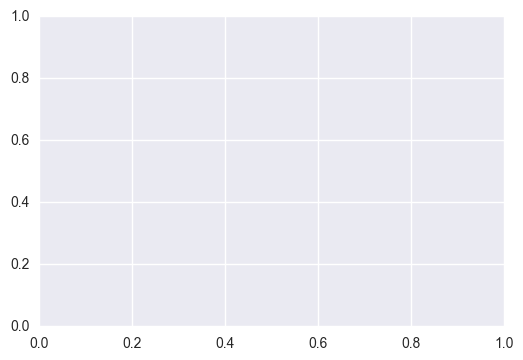

In [18]:
plt.hist(param_cluster,best_cluster_scores)
plt.xlabel('Number of trees in the random forest')
plt.ylabel('Cross-Validated Accuracy')